# Undersøk korpus med metadata

Notebook for å undersøke korpus med metadata


In [ ]:
# aktiver den her cellen for å få siste versjon av nbtext
import module_update

In [2]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

Kommandoen for å lage et korpus er *Corpus()* som bygger et korpus av tekster som sammenlignes med en referanse. I det her eksemplet bygges referansen samtidig, men i et ideelt tilfelle kan vi ønske å la referansen være ferdigbygd et sted. Systemet for webdewey er [her](http://deweysearchno.pansoft.de/webdeweysearch/index.html)

In [22]:
objekt = Corpus(
    period=(1970, 2010),
    #title='%',
    #subject='kjemi',
    ddk='410%',
    reference=150,
    max_books=100)

## Undersøk forskjeller

Dataene viser forskjellem mellom målkorpus og referanse. Se på differansen med kommandoen *difference* som tar et sett parametre. De viktigste for analysen er *freq_exp* som vekter frekvensen til ordene i målkorpuset, og *doc_exp* som vekter dokumentfrekvensen i målkorpuset.

Settes verdien for *top* lik null får du hele korpuset.


In [23]:
objekt.difference(top=10, aslist=False, freq_exp=1.1, doc_exp=1.5)

,diff
verb,0.071253
grammatiske,0.065242
språk,0.064877
språket,0.064136
Language,0.063369
setning,0.063086
substantiv,0.062982
subjekt,0.059119
grammatisk,0.058629
grammatikk,0.057901


In [24]:
objekt.difference(top=150)

Legg til summary() for se litt hva korpuset inneholder

# Metadata for korpuset kan raskt sjekkes

Pass på at ikke korpuset er for stort (mange tusen).

In [25]:
nb.metadata(objekt.target_urn[:5])

[[2016020408048,
  '',
  2000,
  'Språkteknologi i Norge - eksisterende og påkrevet forskning',
  'Norges forskningsråd, Kultur og samfunn',
  'nob',
  ''],
 [2009012900096,
  '',
  2002,
  'Norsk lingvistikk',
  'Norges forskningsråd, Kultur og samfunn',
  'nob',
  ''],
 [2010120708101,
  '',
  1996,
  '699 varme termer',
  'Aarhus Universitetsforlag',
  'dan',
  ''],
 [2008103004065,
  'Lande, Aasulv',
  2001,
  'Sjønna på Elbursfjell',
  'Høyskoleforl.',
  'nno',
  ''],
 [2016071808059,
  'Muller, Charles',
  1981,
  'Innføring i metoder for lingvistisk statistikk',
  'Universitetsforlaget',
  'nob',
  'fre']]

### Søk etter sett av ord i clustret

Finn verdien for ord i clusteret med objekt.check_words('o1 o2 o3 ... oN') med opsjonell spesifikasjon av eksponent. Bare list ordene opp med mellomrom, ord som ikke er i clusteret vil heller ikke vises. Alle andre vises med assosiasjonsverdien og sorteres var høy til lav. Tittel på kolonnen gir en påminnelse om ordet listen er kollokert fra.

In [26]:
objekt.search_words( 'morfologi fonologi . og ,')

,diff
fonologi,1.368058
morfologi,1.208719
",",0.209076
.,0.155333
og,0.132154


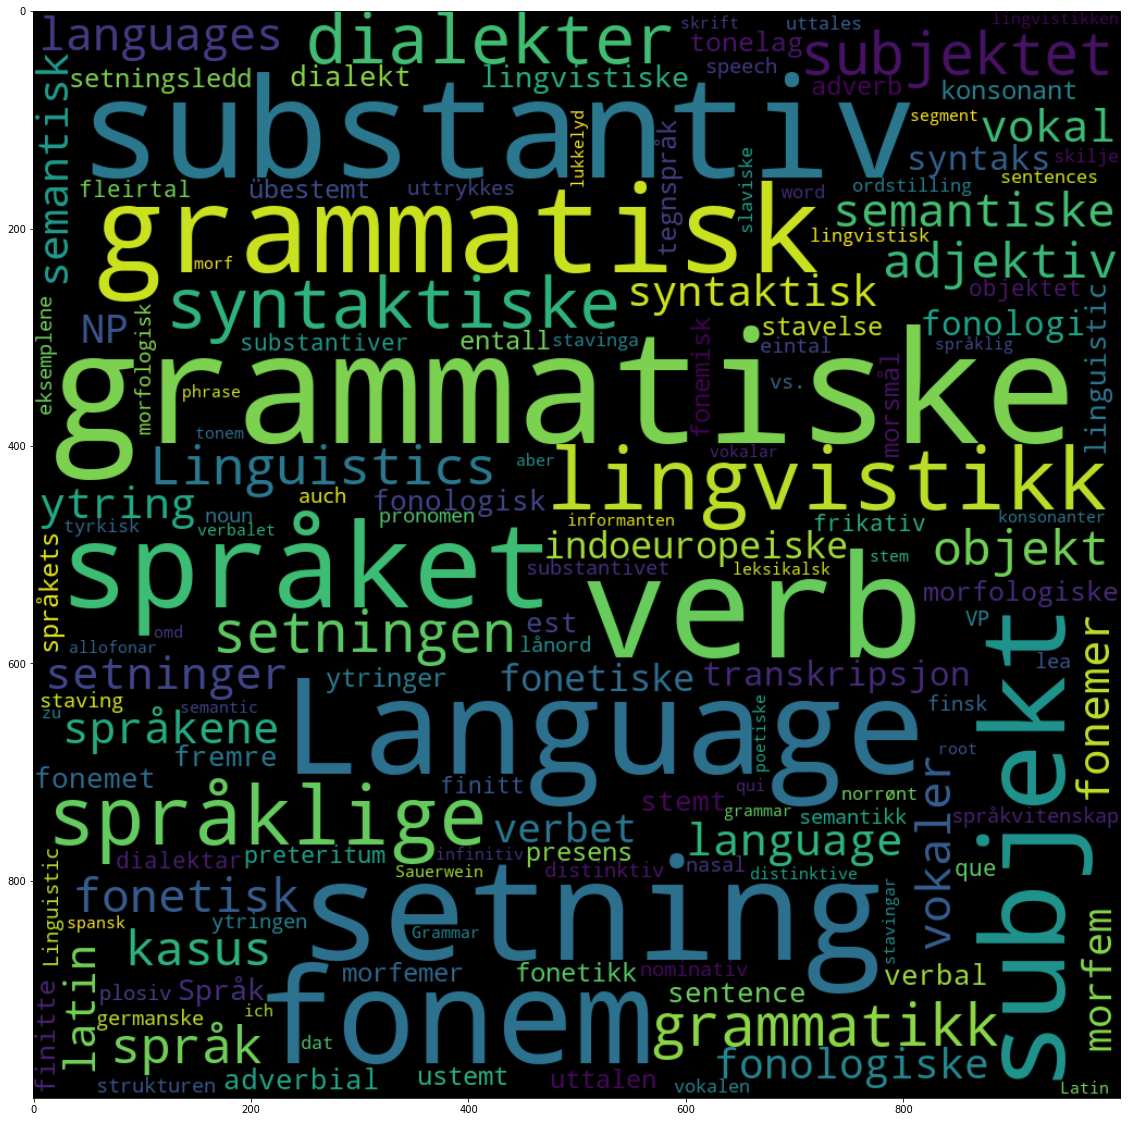

In [27]:
nb.cloud(objekt.difference(aslist=False, top=150))

In [28]:
G=nb.make_network(objekt.target_urn[0], list(objekt.difference(aslist=False, top=150).index) )

True

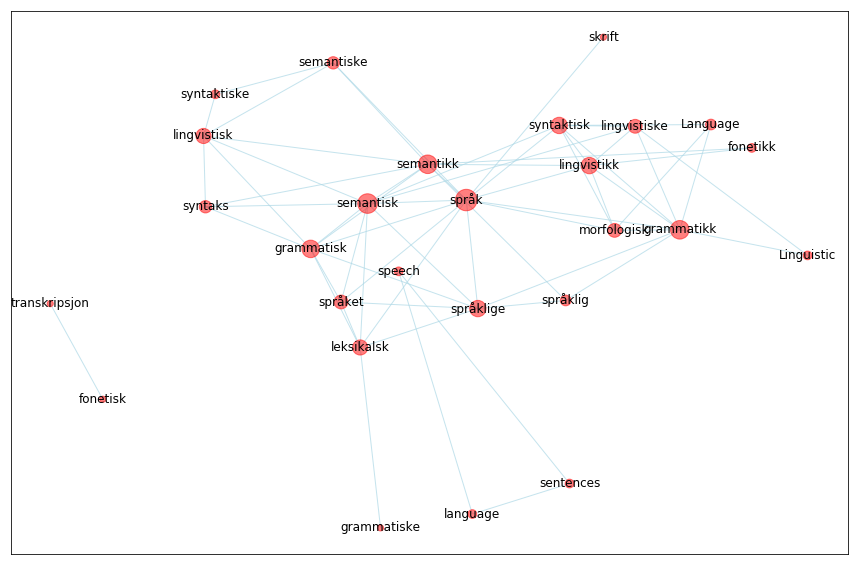

In [29]:
nb.draw_graph_centrality(G, fontsize=12, k=1)

In [21]:
nb.central_betweenness_characters(G)

[('språk', 0.17359905740643708),
 ('analyse', 0.06493204024639744),
 ('språket', 0.04331625694189219),
 ('engelsk', 0.03171343847153025),
 ('t.d.', 0.028723112580374927),
 ('grammatiske', 0.02868157906250904),
 ('type', 0.02618870658757126),
 ('morfem', 0.023707654307351972),
 ('language', 0.017006323677987843),
 ('[', 0.016231325577068672)]